In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('datasets/ex1data1.txt', header=None, names=['population', 'profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [86]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


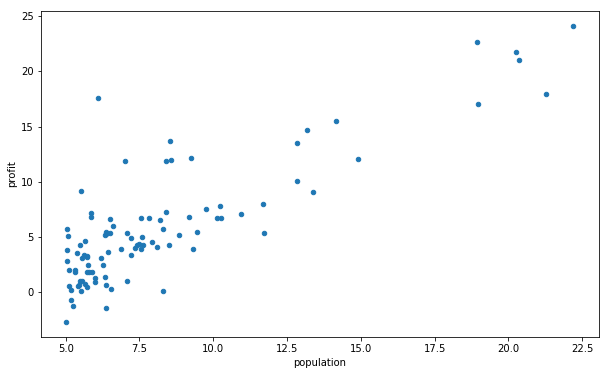

In [117]:
data.plot(kind='scatter', x='population', y='profit', figsize=(10, 6))
plt.show()

In [88]:
data.insert(0, 'Ones', 1) #添加一列
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [89]:
cols = data.shape[1] #取列数
X = data.iloc[:, 0:cols-1] #取前cols列，输入向量
y = data.iloc[:, cols-1:cols] #取最后一列，目标向量
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [90]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [91]:
X = np.matrix(X.values) #转换为matrix
y = np.matrix(y.values)
theta = np.matrix([0, 0])

In [92]:
print(X.shape)
print(y.shape)
print(theta.shape)

(97, 2)
(97, 1)
(1, 2)


In [93]:
def computer_cost(X, y, theta):
    """
    计算损失函数
    """
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
computer_cost(X, y, theta)

32.072733877455676

In [106]:
def gradient_descent(X, y, theta, alpha, epoch):
    """
    X,y 训练集
    theta 参数
    alpha 下降步长
    epoch 迭代次数
    """
    temp = np.matrix(np.zeros(theta.shape)) #中间变量，
    cost = np.zeros(epoch) #记录每次迭代的cost
    m = X.shape[0] #样本数量
    for i in range(epoch):
        temp = theta - (alpha / m) * ((X * theta.T) - y).T * X
        theta = temp
        cost[i] = computer_cost(X, y, theta)
    return theta, cost
alpha = 0.01
epoch = 1000
final_theta, cost = gradient_descent(X, y, theta, alpha, epoch)

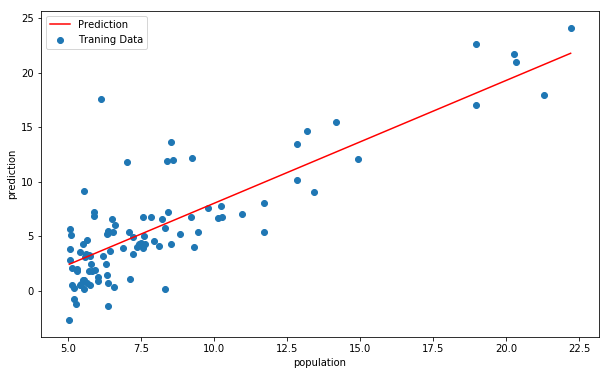

In [107]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = final_theta[0, 0] + final_theta[0, 1] * x
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('prediction')
plt.show()

Text(0,0.5,'cost')

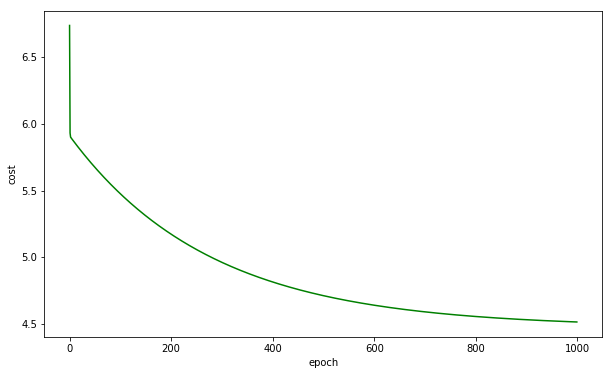

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(epoch), cost, 'g')
ax.set_xlabel('epoch')
ax.set_ylabel('cost')